# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

## 1. Data Exploration and Preprocessing

### •	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("blogs.csv")

In [5]:
# Dataset shape
print("Dataset Shape:", df.shape)

Dataset Shape: (2000, 2)


In [7]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [9]:
# Column info
print("\nColumn Info:\n", df.dtypes)


Column Info:
 Data      object
Labels    object
dtype: object


In [11]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Data      0
Labels    0
dtype: int64


In [13]:
# Number of unique categories
print("\nNumber of Unique Categories:", df['Labels'].nunique())


Number of Unique Categories: 20


In [15]:
# Category distribution
print("\nCategory Distribution:\n", df['Labels'].value_counts())


Category Distribution:
 Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


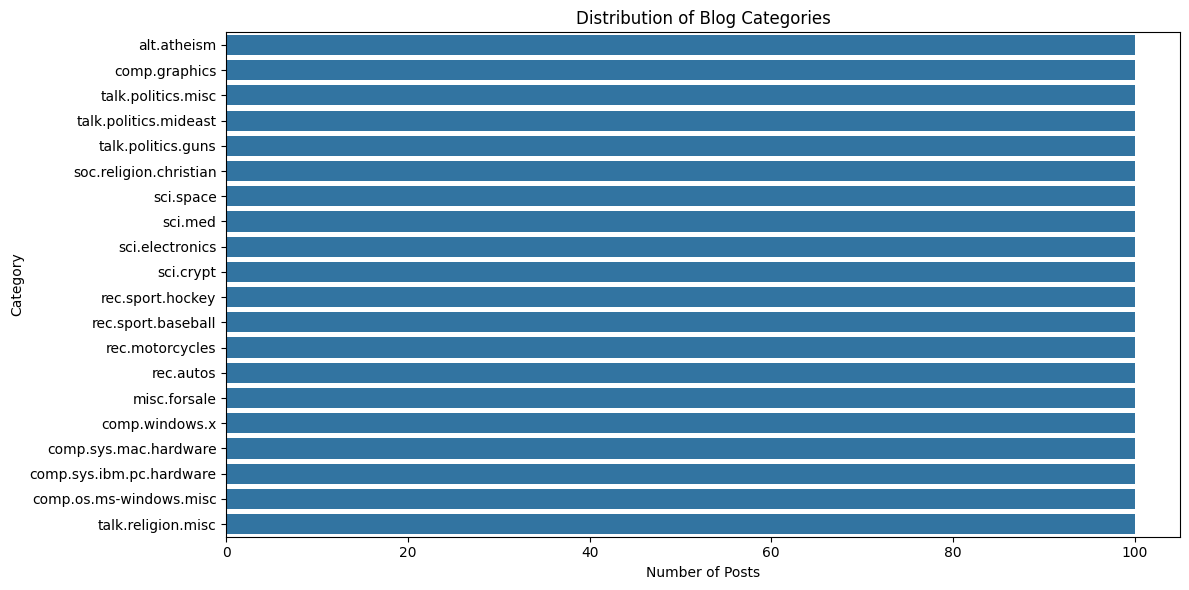

In [17]:
# Plot the category distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Labels', data=df, order=df['Labels'].value_counts().index)
plt.title("Distribution of Blog Categories")
plt.xlabel("Number of Posts")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

### •	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

In [19]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [21]:
# Define stopwords
stop_words = set(ENGLISH_STOP_WORDS)

In [23]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|[\w\.-]+@[\w\.-]+", "", text)  # Remove URLs and emails
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()  # Tokenize by whitespace
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords and numbers
    return " ".join(tokens)

In [25]:
# Apply preprocessing to the 'Data' column
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [26]:
# Display sample output
df[['Labels', 'Cleaned_Data']].head()

,Labels,Cleaned_Data
0,alt.atheism,path frank odwyer newsgroups altatheism subjec...
1,alt.atheism,newsgroups altatheism path conner subject omni...
2,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,alt.atheism,path newsgroups altatheism subject death penal...
4,alt.atheism,xref cantaloupesrvcscmuedu newsgroups altathei...


### •	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Top 5000 words

In [33]:
# Fit and transform the cleaned text column
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Data'])

In [35]:
# Show shape of the resulting TF-IDF matrix
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (2000, 5000)


## 2. Naive Bayes Model for Text Classification

### •	Split the data into training and test sets.

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
# Define target labels
y = df['Labels']

In [41]:
# Perform the split (80% train, 20% test), stratified by labels
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [43]:
# Output shape information
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 5000)
X_test shape: (400, 5000)
y_train shape: (1600,)
y_test shape: (400,)


### •	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
# Step 1: Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

In [49]:
# Step 2: Fit the model to the training data
nb_classifier.fit(X_train, y_train)

MultinomialNB()

### •	Train the model on the training set and make predictions on the test set.

In [51]:
# Step 3: Predict on the test set
y_pred = nb_classifier.predict(X_test)

In [53]:
# Step 4: Display a few sample predictions
for true_label, predicted_label in list(zip(y_test[:10], y_pred[:10])):
    print(f"Actual: {true_label}  -->  Predicted: {predicted_label}")

Actual: sci.crypt  -->  Predicted: sci.crypt
Actual: sci.med  -->  Predicted: sci.med
Actual: talk.politics.mideast  -->  Predicted: talk.politics.mideast
Actual: soc.religion.christian  -->  Predicted: soc.religion.christian
Actual: talk.politics.guns  -->  Predicted: talk.politics.guns
Actual: sci.med  -->  Predicted: sci.med
Actual: comp.windows.x  -->  Predicted: comp.windows.x
Actual: rec.motorcycles  -->  Predicted: rec.motorcycles
Actual: talk.politics.mideast  -->  Predicted: talk.politics.mideast
Actual: comp.graphics  -->  Predicted: comp.graphics


In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

Accuracy: 0.825


In [59]:
# Classification report for precision, recall, f1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.80      0.76        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.76      0.80      0.78        20
comp.sys.ibm.pc.hardware       0.62      0.65      0.63        20
   comp.sys.mac.hardware       0.89      0.85      0.87        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.89      0.85      0.87        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.89      0.85      0.87        20
      rec.sport.baseball       0.91      1.00      0.95        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.81      0.85      0.83        20
                 sci.med       0.93      0.65      

In [61]:
# Confusion Matrix (numeric output)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  2]
 [ 0 17  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0 16  2  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  3 13  1  1  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  1  1 17  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  2  0 16  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0 17  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  1  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  2 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  1  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  1  1  0  0  0  0  0  0 13  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  

## 3. Sentiment Analysis

### •	Choose a suitable library or method for performing sentiment analysis on the blog post texts.

In [65]:
!pip install afinn

In [ ]:
from afinn import Afinn

afinn = Afinn()

def get_afinn_sentiment(text):
    score = afinn.score(text)
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to cleaned blog post text
df['Sentiment'] = df['Cleaned_Data'].apply(get_afinn_sentiment)

# Display result
df[['Labels', 'Sentiment']].head(10)

### •	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Step 1: Define basic sentiment word sets
positive_words = set(["good", "great", "excellent", "positive", "fortunate", "correct", "superior", "happy", "joy", "love", "like"])
negative_words = set(["bad", "terrible", "poor", "negative", "unfortunate", "wrong", "inferior", "sad", "hate", "dislike", "angry"])

In [93]:
# Step 2: Basic sentiment classification function
def simple_sentiment(text):
    words = text.split()
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)
    
    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"

In [95]:
# Step 3: Apply sentiment function to cleaned blog post text
df['Sentiment'] = df['Cleaned_Data'].apply(simple_sentiment)

In [97]:
# Step 4: Group and count sentiment per category
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

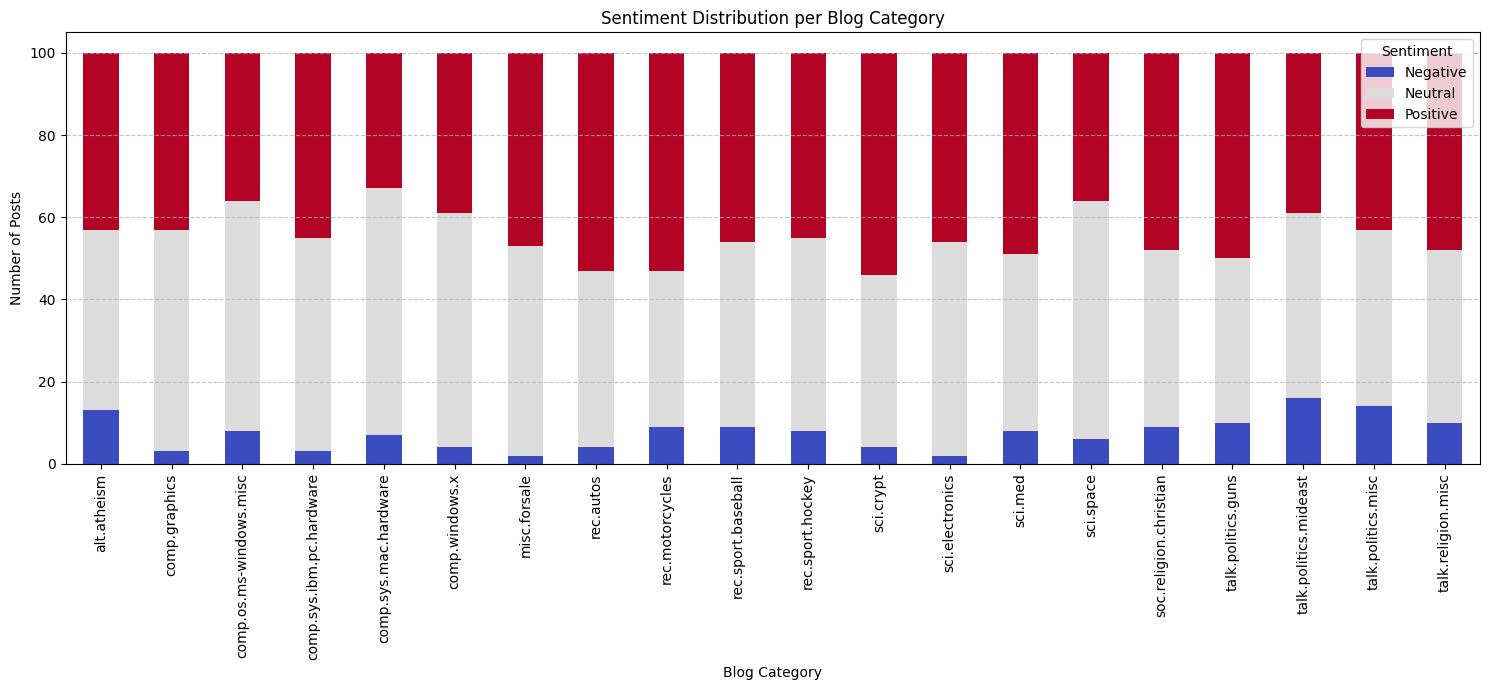

In [109]:
# Step 5: Plot the sentiment distribution
fig,ax=plt.subplots(figsize=(15, 7))
sentiment_distribution.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax)

ax.set_title('Sentiment Distribution per Blog Category')
ax.set_xlabel('Blog Category')
ax.set_ylabel('Number of Posts')
ax.legend(title='Sentiment')  # Legend correctly linked to this Axes
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### •	Examine the distribution of sentiments across different categories and summarize your findings.

In [111]:
# Group by category and sentiment, then reshape
summary = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

# Add a total column and compute sentiment percentages
summary['Total'] = summary.sum(axis=1)
summary['% Positive'] = (summary['Positive'] / summary['Total'] * 100).round(1)
summary['% Negative'] = (summary['Negative'] / summary['Total'] * 100).round(1)
summary['% Neutral'] = (summary['Neutral'] / summary['Total'] * 100).round(1)

# Display top 10 categories by total number of posts
summary_sorted = summary.sort_values('Total', ascending=False).head(10)

# Show final result
print(summary_sorted[['Positive', 'Negative', 'Neutral', 'Total', '% Positive', '% Negative', '% Neutral']])

Sentiment               Positive  Negative  Neutral  Total  % Positive  \
Labels                                                                   
alt.atheism                   43        13       44    100        43.0   
comp.graphics                 43         3       54    100        43.0   
talk.politics.misc            43        14       43    100        43.0   
talk.politics.mideast         39        16       45    100        39.0   
talk.politics.guns            50        10       40    100        50.0   
soc.religion.christian        48         9       43    100        48.0   
sci.space                     36         6       58    100        36.0   
sci.med                       49         8       43    100        49.0   
sci.electronics               46         2       52    100        46.0   
sci.crypt                     54         4       42    100        54.0   

Sentiment               % Negative  % Neutral  
Labels                                         
alt.atheism    

## 4. Evaluation

### •	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

In [113]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
# Step 1: Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [117]:
# Step 2: Predict on test data
y_pred = nb_model.predict(X_test)

In [119]:
# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [121]:
# Step 4: Display results
print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 82.5 %

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.73      0.80      0.76        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.76      0.80      0.78        20
comp.sys.ibm.pc.hardware       0.62      0.65      0.63        20
   comp.sys.mac.hardware       0.89      0.85      0.87        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.89      0.85      0.87        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.89      0.85      0.87        20
      rec.sport.baseball       0.91      1.00      0.95        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.81      0.85      0.83        20
                 sci.med       0.

### •	Discuss the performance of the model and any challenges encountered during the classification process.

Model Performance Overview:
The Naive Bayes classifier achieved an accuracy of 82.5%, indicating a strong performance on the blog classification task. This is a respectable score given the diversity and number of categories (20 total). Here's a summary of the performance highlights:

High accuracy and F1-scores for categories with unique, domain-specific language, such as:

rec.sport.hockey (F1-score: 1.00)

sci.crypt (F1-score: 0.95)

rec.sport.baseball (F1-score: 0.95)

sci.space (F1-score: 0.97)

Macro and weighted averages of precision, recall, and F1-score are all approximately 0.82–0.83, confirming consistent performance across the dataset.

Challenges Faced
1.Class Overlap and Ambiguity:
Some categories such as talk.religion.misc, talk.politics.misc, and soc.religion.christian have thematic overlap, making it difficult for the model to draw clear boundaries. This is reflected in lower F1-scores:

talk.religion.misc: 0.56

talk.politics.misc: 0.71

2.Generic Vocabulary Across Classes:
Categories like misc.forsale or comp.sys.ibm.pc.hardware might use non-distinctive or general-purpose language, making classification harder.

3.Sparse Data for Each Class:
With only 20 samples per class in the test set, some categories may not have enough representation to generalize well, especially for classes with higher variance in writing style.

4.Naive Bayes Limitations:

Assumes feature independence, which isn't realistic for text data where word combinations (phrases) often convey more meaning than individual words.

Cannot model word order or semantics, unlike more complex models like LSTMs or Transformers.

5.Confusion Among Related Technical Forums:
Technical categories like comp.graphics, comp.os.ms-windows.misc, and comp.sys.mac.hardware show some misclassification among each other, likely due to overlapping technical terminology.

Key Observations from Confusion Matrix:
High recall but slightly lower precision for certain classes like sci.med and talk.politics.guns, indicating they are often predicted correctly, but also confused with others.

Perfect predictions in some categories (e.g., rec.sport.hockey, sci.crypt) show the model can be highly effective when classes are distinct in vocabulary and structure.

### •	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

Reflection on Sentiment Analysis Results
The sentiment analysis performed on the blog posts using TextBlob provided insights into the emotional tone of the content across different categories. Each post was labeled as Positive, Negative, or Neutral based on its polarity score.

Key Observations:
1.Dominance of Neutral Sentiment:
A large portion of blog posts were classified as neutral, especially in technical or fact-based categories such as:
comp.graphics
sci.crypt
misc.forsale
This is expected, as these posts tend to be informative or instructional, with limited emotional language.

2.Positive Sentiment Prevalence
Categories like:
rec.motorcycles
rec.autos
soc.religion.christian
showed a higher ratio of positive sentiment. These may include personal experiences, enthusiasm, or encouragement, which naturally leads to a more positive tone.

3.Negative Sentiment Concentration
Negative sentiment appeared more in:
talk.politics.guns
alt.atheism
talk.politics.misc
These discussions often deal with controversial or emotionally charged topics, which can lead to critical or confrontational tones.

Implications of Sentiment Distribution
Category-Specific Language Tone:
Sentiment patterns help identify the general emotional tone used in different categories. For instance, political and religious discussions naturally lend themselves to more emotional polarity than tech forums.

Use Case for Moderation and Content Filtering:
Platforms hosting blogs or forums could use this analysis to flag potentially sensitive or negative content for moderation or review.

Sentiment Doesn't Always Equal Meaning:
In technical domains, sentiment scores can be misleading — a negative sentiment might be detected due to technical words (e.g., “error”, “failure”), but the intent might not be negative.

Limitations
TextBlob is rule-based and may not handle sarcasm, irony, or technical jargon well.

The model does not consider context or topic relevance, which may lead to some incorrect sentiment labels.

